In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("E:/Futurense/Project - 1/Data/census_2011.csv")

# Problem Statement 1: (Keep the relevant data)

The census 2011 file contains many fields, which we may not use. 
Removing some columns so that we are left with only relevant data.

In [11]:
req_col = ['State name','District name','Population','Male','Female','Literate','Male_Literate','Female_Literate','Rural_Households','Urban_Households','Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50','Age not stated']

In [12]:
data = data [req_col]

In [13]:
data.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# Problem Statement 2: (Rename the Column names)

For uniformity in the datasets and taking into consideration the census year, we are renaming some columns. 

In [14]:
col_rename = {
    'State name'  : 'State/UT',
    'District name'  : 'District',
    'Male_Literate' : 'Literate_Male',
    'Female_Literate' : 'Literate_Female',
    'Rural_Households'  : 'Households_Rural',
    'Urban_Households'  : 'Households_Urban',
    'Age_Group_0_29' : 'Young_and_Adult',
    'Age_Group_30_49' : 'Middle_Aged',
    'Age_Group_50' : 'Senior_Citizen',
    'Age not stated' : 'Age_Not_Stated',
}

In [15]:
data.rename (columns = col_rename ,inplace = True)

In [16]:
data.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


# Problem Statement 3: (Rename State/UT Names)

The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so 
that only the first character of each word in the name is in upper case and the rest are in lower case. 
However, if the word is “and” then it should be all lowercase.

In [17]:
def State_Name(word):
    if word.lower() == 'and':
        return 'and'
    else:
        return word.title()

In [18]:
data['State/UT'] = data['State/UT'].apply(lambda x: ' '.join(State_Name(w) for w in x.split()))

In [19]:
data.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [20]:
data.tail()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0
639,Andaman and Nicobar Islands,South Andaman,NaN,127283.0,110859.0,190266.0,105794.0,84472.0,34901.0,50631.0,85532.0,128402.0,76332.0,33128.0,280.0


# Problem Statement 4: (New State/UT formation)

In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana 
are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” 
for the given districts.

In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil. 
Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 


In [21]:
telangana_districts = []
with open('Telangana.txt', 'r') as file:
    telangana_districts = [line.strip() for line in file]

ladakh_districts = ['Leh', 'Kargil']

data.loc[data['District'].isin(telangana_districts), 'State/UT']='Telangana'
data.loc[data['District'].isin(ladakh_districts), 'State/UT']='Laddakh'

In [22]:
data.loc[(data['State/UT'] == "Laddakh") | (data['State/UT'] == "Telangana")]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
531,Telangana,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Telangana,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Telangana,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Telangana,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Telangana,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Telangana,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Telangana,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Telangana,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Telangana,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0


# Problem Statement 5: (Find and process Missing Data)

Find and store the percentage of data missing for each column.

In [23]:
data.isnull().sum()

State/UT             0
District             0
Population          30
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [24]:
missing_percentage_before = (data.isnull().sum() / len(data)) * 100
print((missing_percentage_before))

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64


In [25]:
data['Population'].fillna(data['Male'] + data['Female'], inplace=True)

In [26]:
data['Male'].fillna(data['Population'] - data['Female'], inplace=True)

In [27]:
data['Female'].fillna(data['Population'] - data['Male'], inplace=True)

In [28]:
data['Literate'].fillna(data['Literate_Male'] + data['Literate_Female'],inplace=True)

In [29]:
data['Literate_Female'].fillna(data['Literate'] - data['Literate_Male'],inplace=True)

In [30]:
data['Literate_Male'].fillna(data['Literate'] - data['Literate_Female'],inplace=True)

In [31]:
data['Households_Rural'].fillna(data['Households'] - data['Households_Urban'],inplace=True)

In [32]:
data['Households_Urban'].fillna(data['Households'] - data['Households_Rural'],inplace=True)

In [33]:
data['Households'].fillna(data['Households_Rural'] + data['Households_Urban'],inplace=True)

In [34]:
data['Young_and_Adult'].fillna(data['Population'] - data['Middle_Aged'] - data['Senior_Citizen'] - data['Age_Not_Stated'],inplace=True)

In [35]:
data['Middle_Aged'].fillna(data['Population'] - data['Young_and_Adult'] - data['Senior_Citizen'] - data['Age_Not_Stated'],inplace=True)

In [36]:
data['Senior_Citizen'].fillna(data['Population'] - data['Young_and_Adult'] - data['Middle_Aged'] - data['Age_Not_Stated'],inplace=True)

In [37]:
data['Age_Not_Stated'].fillna(data['Population'] - data['Young_and_Adult'] - data['Middle_Aged'] - data['Senior_Citizen'],inplace=True)

In [38]:
missing_percentage_after = (data.isnull().sum() / len(data)) * 100
print(missing_percentage_after)

State/UT            0.00000
District            0.00000
Population          0.15625
Male                0.15625
Female              0.00000
Literate            0.31250
Literate_Male       0.31250
Literate_Female     0.31250
Households_Rural    0.93750
Households_Urban    0.46875
Households          0.78125
Young_and_Adult     0.62500
Middle_Aged         0.93750
Senior_Citizen      1.25000
Age_Not_Stated      0.46875
dtype: float64


In [39]:
mpb=[]
mpa=[]

for i in missing_percentage_before:
    mpb.append(i)
    
for i in missing_percentage_after:
    mpa.append(i)

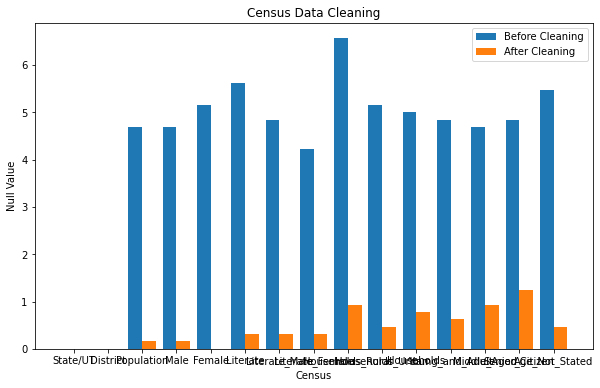

In [40]:
X = data.columns.tolist()
Y = mpb
Z = mpa
plt.figure(figsize=(10, 6))
X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, Y, 0.4, label = 'Before Cleaning') 
plt.bar(X_axis + 0.2, Z, 0.4, label = 'After Cleaning') 
  
plt.xticks(X_axis, X) 
plt.xlabel("Census") 
plt.ylabel("Null Value") 
plt.title("Census Data Cleaning")
plt.legend()
plt.show()

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 

In [41]:
mpb=[]
for i in missing_percentage_before:
    mpb.append(i)
print(mpb)

[0.0, 0.0, 4.6875, 4.6875, 5.15625, 5.625, 4.84375, 4.21875, 6.5625, 5.15625, 5.0, 4.84375, 4.6875, 4.84375, 5.46875]


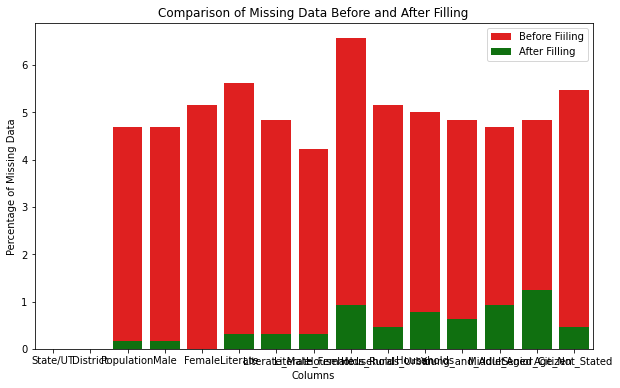

In [42]:
#X = data.columns.tolist()
#bar_width = 0.35
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_before.index, y=missing_percentage_before, color='red', label='Before Fiiling')
sns.barplot(x=missing_percentage_after.index, y=missing_percentage_after, color='green', label='After Filling')

plt.title('Comparison of Missing Data Before and After Filling')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
#plt.set_xticklabels(missing_percentage_before.index + bar_width / 2)
#plt.set_xticklabels(missing_percentage_before.index)
plt.legend()
plt.show()

# Problem Statement 6: (Save Data)

Saving the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.

In [43]:
data.to_csv("E:/Futurense/Project - 1/Clean_data/census_data.csv",index=False)

# Problem Statement 7: (Process the relevant data)

From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.

In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. 
seem to be in percentage terms and not in absolute terms.
The total number of households in a district can be found in the census data. Take the information from the census data and 
find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.


In [44]:
data_housing=pd.read_csv("housing.csv")

In [45]:
data_housing.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8


In [46]:
data_housing.tail()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
1903,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Total,...,100,52.6,44.6,2.8,97.5,51.2,43.5,2.8,2.5,1.4
1904,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Urban,...,100,37.5,55.9,6.6,95.8,36.3,53.0,6.5,4.2,1.2
1905,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Rural,...,100,63.0,33.5,3.5,98.3,62.0,32.8,3.5,1.7,1.0
1906,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Total,...,100,71.5,26.4,2.2,98.5,70.6,25.8,2.1,1.5,0.9
1907,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Urban,...,100,77.4,21.4,1.2,98.7,76.6,20.9,1.2,1.3,0.8


In [47]:
census_data = pd.read_csv("E:\Futurense\Project - 1\Clean_data\census_data.csv")

In [48]:
relevant_columns = ['District Name', 'Rural/Urban', 'Total Number of households', 
                    'Total Number of Livable', 'Total Number of Dilapidated', 'Latrine_premise']

relevant_housing_data = data_housing[relevant_columns]

merged_data = pd.merge(relevant_housing_data, census_data, left_on='District Name', right_on='District', how='left')

#merged_data['Households_Rural'] = merged_data['Total Number of households'] * merged_data['Rural/Urban'].apply(lambda x: 1 if x == 'Rural' else 0)
#merged_data['Households_Urban'] = merged_data['Total Number of households'] * merged_data['Rural/Urban'].apply(lambda x: 1 if x == 'Urban' else 0)
merged_data['Households_Rural_Livable'] = merged_data['Households_Rural'] * merged_data['Total Number of Livable'] / 100
merged_data['Households_Rural_Dilapidated'] = merged_data['Households_Rural'] * merged_data['Total Number of Dilapidated'] / 100
merged_data['Households_Rural_Toilet_Premise'] = merged_data['Households_Rural'] * merged_data['Latrine_premise'] / 100
merged_data['Households_Urban_Livable'] = merged_data['Households_Urban'] * merged_data['Total Number of Livable'] / 100
merged_data['Households_Urban_Dilapidated'] = merged_data['Households_Urban'] * merged_data['Total Number of Dilapidated'] / 100
merged_data['Households_Urban_Toilet_Premise'] = merged_data['Households_Urban'] * merged_data['Latrine_premise'] / 100

merged_data.head()


,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,State/UT,District,Population,Male,...,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,Rural,100,58.1,8.3,48.9,Jammu and Kashmir,Kupwara,870354.0,474190.0,...,600759.0,178435.0,89679.0,1481.0,92052.478,13150.354,77476.182,13494.306,1927.758,11357.514
1,Kupwara,Total,100,57.3,7.9,50.9,Jammu and Kashmir,Kupwara,870354.0,474190.0,...,600759.0,178435.0,89679.0,1481.0,90784.974,12516.602,80644.942,13308.498,1834.854,11822.034
2,Kupwara,Urban,100,49.5,4.8,70.2,Jammu and Kashmir,Kupwara,870354.0,474190.0,...,600759.0,178435.0,89679.0,1481.0,78426.810,7605.024,111223.476,11496.870,1114.848,16304.652
3,Badgam,Rural,100,46.3,3.9,83.3,Jammu and Kashmir,Badgam,753745.0,398041.0,...,503223.0,160933.0,88978.0,611.0,74380.487,6265.311,133820.617,12588.970,1060.410,22649.270
4,Badgam,Total,100,44.7,3.8,84.3,Jammu and Kashmir,Badgam,753745.0,398041.0,...,503223.0,160933.0,88978.0,611.0,71810.103,6104.662,135427.107,12153.930,1033.220,22921.170


Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, 
such that it  has the following column names.

In [49]:
final_columns = ['District Name', 'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
                 'Households_Urban', 'Households_Urban_Livable', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']

final_data = merged_data[final_columns]

column_rename = {
    'District Name': 'District',
    'Households_Rural': 'Households_Rural',
    'Households_Rural_Livable': 'Households_Rural_Livable',
    'Households_Rural_Dilapidated': 'Households_Rural_Dilapidated',
    'Households_Rural_Toilet_Premise': 'Households_Rural_Toilet_Premise',
    'Households_Urban': 'Households_Urban',
    'Households_Urban_Livable': 'Households_Urban_Livable',
    'Households_Urban_Dilapidated': 'Households_Urban_Dilapidated',
    'Households_Urban_Toilet_Premise': 'Households_Urban_Toilet_Premise'
}

final_data = final_data.rename(columns=column_rename)

In [50]:
final_data.to_csv("E:/Futurense/Project - 1/Clean_data/housing.csv",index=False)